<a href="https://colab.research.google.com/github/Jaypatvi/DL/blob/main/dl1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

fashion_mnist = keras.datasets.fashion_mnist
(X_train_full,y_train_full),(X_test,y_test)= fashion_mnist.load_data()
X_valid,X_train=X_train_full[:5000]/255.0,X_train_full[5000:]
y_valid,y_train=y_train_full[:5000],y_train_full[5000:]
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
"Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import keras
housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test= train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid=train_test_split(X_train_full, y_train_full, random_state=42)
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_valid_scaled=scaler.transform(X_valid)
X_test_scaled=scaler.transform(X_test)
model=keras.models.Sequential([keras.layers.Dense(30,activation="relu",input_shape=X_train.shape[1:]),keras.layers.Dense(1)])
model.compile(loss="mean_squared_error",optimizer="sgd")
history=model.fit(X_train,y_train,epochs=20,validation_data=(X_valid,y_valid))
mse_test=model.evaluate(X_test,y_test)
X_new=X_test[:3]
y_pred=model.predict(X_new)
print(y_pred)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 740693590283487543296.0000 - val_loss: 6087234813952.0000
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1371141177344.0000 - val_loss: 2597287.5000
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 585059.9375 - val_loss: 2.3098
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.6125 - val_loss: 1.3167
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.3644 - val_loss: 1.3156
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.3500 - val_loss: 1.3180
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.3567 - val_loss: 1.3176
Epoch 8/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.3711 - val_loss: 1.3163
Epoch 9/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.2994 - val_loss: 1.3179
Epoch 10/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3212 - val_loss: 1.3178
Epoch 11/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.3343 - val_loss: 1.31

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import keras
housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test= train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid=train_test_split(X_train_full, y_train_full, random_state=42)
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_valid_scaled=scaler.transform(X_valid)
X_test_scaled=scaler.transform(X_test)
input=keras.layers.Input(shape=X_train.shape[1:])
hidden1=keras.layers.Dense(30,activation="relu")(input)
hidden2=keras.layers.Dense(30,activation="relu")(hidden1)
concat=keras.layers.Concatenate()([input,hidden2])
output=keras.layers.Dense(1)(concat)
model=keras.models.Model(inputs=[input],outputs=[output])
X_new=X_test[:3]
y_pred=model.predict(X_new)
print(y_pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
[[-223.12926]
 [-248.64601]
 [-220.7997 ]]


In [ ]:
%pip install -q -U keras-tuner
import tensorflow as tf
import keras_tuner as kt
from tensorflow import keras
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full,y_train_full),(X_test,y_test)= fashion_mnist.load_data()
X_valid,X_train=X_train_full[:5000]/255.0,X_train_full[5000:]
y_valid,y_train=y_train_full[:5000],y_train_full[5000:]
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
"Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
class_names[y_train[0]]
X_new=X_test[:3]
def build_model(hp):
  n_hidden=hp.Int("n_hidden",min_value=0,max_value=8,default=2)
  n_neurons=hp.Int("n_neurons",min_value=16,max_value=256)
  learning_rate=hp.Float("learning_rate",min_value=1e-4,max_value=1e-2,sampling="log")
  optimizer=hp.Choice("optimizer",values=["sgd","adam"])
  if optimizer=="sgd":
    optimizer=keras.optimizers.SGD(learning_rate=learning_rate)
  else:
    optimizer=keras.optimizers.Adam(learning_rate=learning_rate)
  model=tf.keras.Sequential()
  model.add(tf.keras.layers.Flatten())
  for _ in range(n_hidden):
    model.add(tf.keras.layers.Dense(n_neurons,activation="relu"))
  model.add(tf.keras.layers.Dense(10,activation="softmax"))
  model.compile(loss="sparse_categorical_crossentropy",optimizer=optimizer,metrics=["accuracy"])
  return model
random_search_tuner=kt.RandomSearch(build_model,objective="val_accuracy",max_trials=5,overwrite=True,directory="my_fashion")
random_search_tuner.search(X_train,y_train,epochs=10,validation_data=(X_valid,y_valid))
top3models=random_search_tuner.get_best_models(num_models=3)
best_model=top3models[0]
top3_params=random_search_tuner.get_best_hyperparameters(num_trials=3)
best_params=top3_params[0]
best_trail=random_search_tuner.oracle.get_best_trials(num_trials=1)[0]
best_trail.summary()
best_model.fit(X_train,y_train,epochs=10)
test_loss,test_accuracy=best_model.evaluate(X_test,y_test)
print(f"test accuracy:{test_accuracy:.3f}")
best_model.summary()

Trial 5 Complete [00h 01m 27s]
val_accuracy: 0.09139999747276306

Best val_accuracy So Far: 0.8366000056266785
Total elapsed time: 00h 08m 38s
Trial 0 summary
Hyperparameters:
n_hidden: 0
n_neurons: 202
learning_rate: 0.0019555682562668866
optimizer: sgd
Score: 0.8366000056266785
Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7995 - loss: 277.0208
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8027 - loss: 270.8280
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7938 - loss: 290.4950
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8007 - loss: 275.0609
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8044 - loss: 272.5476
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8029 - loss: 273.5103
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8071 - loss: 263.2389
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8069 - loss: 265.0189

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │           7,850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,852 (30.68 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [ ]:
import numpy as np
def unitstep(v):
  if v>=0:
    return 1
  else:
    return 0

def perceptron(x,w,b):
  v=np.dot(w,x)+b
  y=unitstep(v)
  return y

x=np.array([0,0])
w=np.array([1,1])
b=-1.5
y=perceptron(x,w,b)
#wnot=-1 bnot=0.5
def not_logicfunction(x):
  wnot=-1
  bnot=0.5
  return perceptron(x,wnot,bnot)

#w1=wand1=1
#w2=wand2=1 band=-1.5
def and_logicfunction(x):
  w=np.array([1,1])
  band=-1.5
  return perceptron(x,w,band)

#w1=1,w2=1,bor=-0.5
def or_logicfunction(x):
  w=np.array([1,1])
  bor=-0.5
  return perceptron(x,w,bor)

def xor_logicfunction(x):
  y1=and_logicfunction(x)
  y2=or_logicfunction(x)
  y3=not_logicfunction(y1)
  final_x=np.array([y2,y3])
  finaloutput=and_logicfunction(final_x)
  return finaloutput

test1=np.array([0,1])
test2=np.array([1,1])
test3=np.array([0,0])
test4=np.array([1,0])

print("xor({},{})={}".format(0,1,or_logicfunction(test1)))
print("xor({},{})={}".format(1,1,or_logicfunction(test2)))
print("xor({},{})={}".format(0,0,or_logicfunction(test3)))
print("xor({},{})={}".format(1,0,or_logicfunction(test4)))



xor(0,1)=1
xor(1,1)=1
xor(0,0)=0
xor(1,0)=1


In [ ]:
target1=xor_logicfunction(test1)
target2=xor_logicfunction(test2)
target3=xor_logicfunction(test3)
target4=xor_logicfunction(test4)
def weightupdate():
  if target1==1:
    print("sab sorted hai")
  else:
    class MyPerceptron:

      def __init__(self, learning_rate=0.1, n_iterations=100):

        self.learning_rate = learning_rate

        self.n_iterations = n_iterations

        self.weights = None

        self.bias = None

      def fit(self, X, y):

        n_samples, n_features = X.shape

        self.weights = np.zeros(n_features)
        self.bias = 0


Training with SGD
epoch1/50-SGD loss:1.187724
epoch2/50-SGD loss:1.118702
epoch3/50-SGD loss:1.095956
epoch4/50-SGD loss:1.082057
epoch5/50-SGD loss:1.071753
epoch6/50-SGD loss:1.064608
epoch7/50-SGD loss:1.058438
epoch8/50-SGD loss:1.052361
epoch9/50-SGD loss:1.048468
epoch10/50-SGD loss:1.043186
epoch11/50-SGD loss:1.040510
epoch12/50-SGD loss:1.036769
epoch13/50-SGD loss:1.033675
epoch14/50-SGD loss:1.030721
epoch15/50-SGD loss:1.027725
epoch16/50-SGD loss:1.024780
epoch17/50-SGD loss:1.023463
epoch18/50-SGD loss:1.019834
epoch19/50-SGD loss:1.017422
epoch20/50-SGD loss:1.015876
epoch21/50-SGD loss:1.013366
epoch22/50-SGD loss:1.010778
epoch23/50-SGD loss:1.006993
epoch24/50-SGD loss:1.005246
epoch25/50-SGD loss:1.002008
epoch26/50-SGD loss:0.999142
epoch27/50-SGD loss:0.997587
epoch28/50-SGD loss:0.995366
epoch29/50-SGD loss:0.993077
epoch30/50-SGD loss:0.990306
epoch31/50-SGD loss:0.988240
epoch32/50-SGD loss:0.984707
epoch33/50-SGD loss:0.979961
epoch34/50-SGD loss:0.978816
epoc

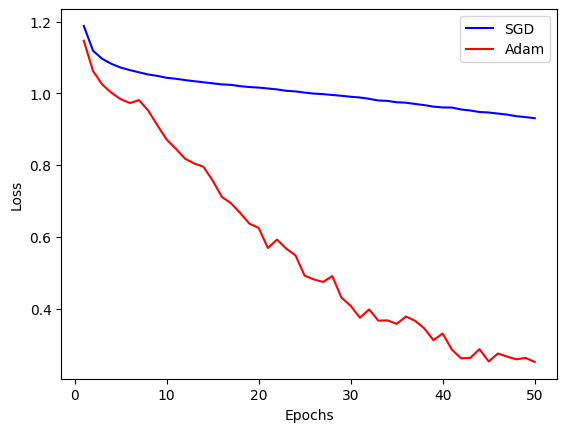

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
import numpy as np
import matplotlib.pyplot as plt

def create_data():
  X=np.random.randn(1000,10)
  y=np.random.randn(1000,1)
  return X,y

def create_model():
  model=models.Sequential([layers.Dense(50,activation='relu',input_shape=(10,)),layers.Dense(20,activation='relu'),layers.Dense(1)])
  return model

def train_model_with_history(model,optimizer,epochs,batch_size,X,y,optimizer_name):
  model.compile(optimizer=optimizer,loss='mean_squared_error')
  history=[]
  for epoch in range(epochs):
    hist=model.fit(X, y, epochs=1, batch_size=batch_size, verbose=0)
    loss=hist.history['loss'][0]
    history.append(loss)
    print(f"epoch{epoch+1}/{epochs}-{optimizer_name} loss:{loss:4f}")
  return history

X,y=create_data()
model_sgd=create_model()
model_adam=create_model()
optimizer_sgd=optimizers.SGD(learning_rate=0.01)
optimizer_adam=optimizers.Adam(learning_rate=0.01)
epochs=50
batch_size=32
print("\nTraining with SGD")
sgd_loss=(train_model_with_history(model_sgd,optimizer_sgd,epochs,batch_size,X,y,'SGD'))
print("\nTraining with Adam")
adam_loss=(train_model_with_history(model_adam,optimizer_adam,epochs,batch_size,X,y,'Adam'))
plt.plot(range(1,epochs+1),sgd_loss,label="SGD",color="blue")
plt.plot(range(1,epochs+1),adam_loss,label="Adam",color="red")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 69s 35ms/step - accuracy: 0.9014 - loss: 0.3196 - val_accuracy: 0.9860 - val_loss: 0.0420
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 77s 33ms/step - accuracy: 0.9860 - loss: 0.0444 - val_accuracy: 0.9885 - val_loss: 0.0342
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 63s 34ms/step - accuracy: 0.9906 - loss: 0.0305 - val_accuracy: 0.9889 - val_loss: 0.0321
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9856 - loss: 0.0401
Test accuracy: 0.9889000058174133


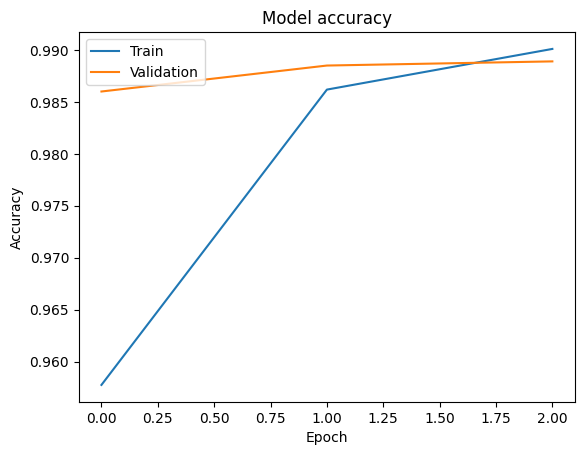

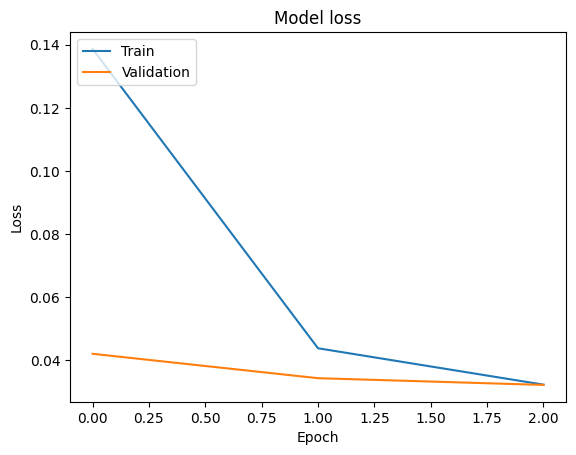

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
(train_images,train_labels),(test_images,test_labels)=datasets.mnist.load_data()
train_images=train_images.reshape((train_images.shape[0],28,28,1)).astype('float32')/255
test_images=test_images.reshape((test_images.shape[0],28,28,1)).astype('float32')/255

model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=3, validation_data=(test_images, test_labels))
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

Exception ignored in: <function _xla_gc_callback at 0x7840382b7ac0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/jax/_src/lib/__init__.py", line 96, in _xla_gc_callback
    def _xla_gc_callback(*args):
KeyboardInterrupt: 


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 818s 417ms/step - accuracy: 0.7596 - loss: 0.7092 - val_accuracy: 0.9765 - val_loss: 0.0831
313/313 ━━━━━━━━━━━━━━━━━━━━ 34s 109ms/step - accuracy: 0.9716 - loss: 0.1015
Test accuracy: 0.9764999747276306


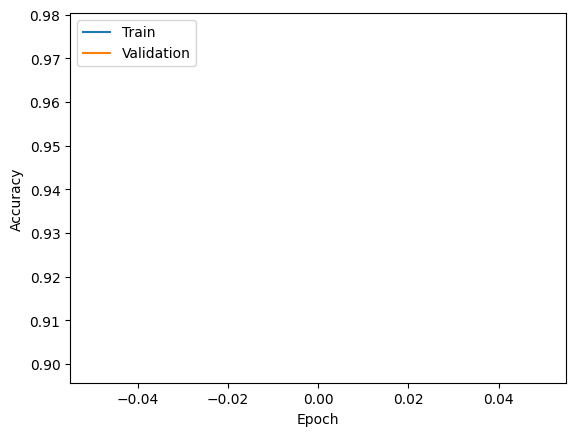

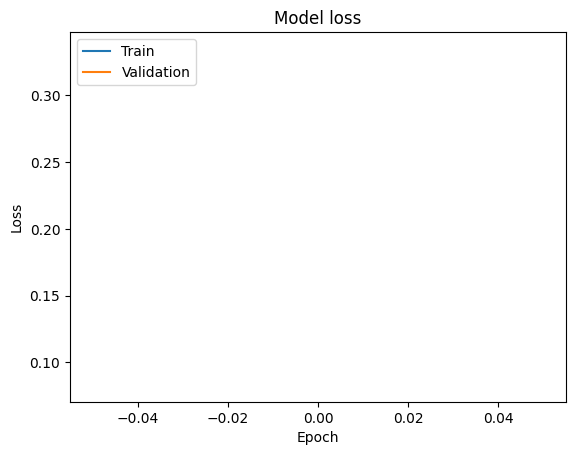

In [ ]:
import tensorflow as tf
from tensorflow import keras
from functools import partial
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
(train_images,train_labels),(test_images,test_labels)=datasets.mnist.load_data()
train_images=train_images.reshape((train_images.shape[0],28,28,1)).astype('float32')/255
test_images=test_images.reshape((test_images.shape[0],28,28,1)).astype('float32')/255

DefaultConv2D=partial(keras.layers.Conv2D,kernel_size=3,activation="relu",padding="SAME")
model=keras.models.Sequential([
  DefaultConv2D(filters=64,kernel_size=7,input_shape=[28,28,1]),
  keras.layers.MaxPooling2D(pool_size=2),
  DefaultConv2D(filters=128),
  DefaultConv2D(filters=128),
  keras.layers.MaxPooling2D(pool_size=2),
  DefaultConv2D(filters=256),
  DefaultConv2D(filters=256),
  keras.layers.MaxPooling2D(pool_size=2),
  keras.layers.Flatten(),
  keras.layers.Dense(units=128,activation="relu"),
  keras.layers.Dropout(0.5),
  keras.layers.Dense(units=64,activation="relu"),
  keras.layers.Dropout(0.5),
  keras.layers.Dense(units=10,activation="softmax")
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=1, validation_data=(test_images, test_labels))
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from functools import partial
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
(train_images,train_labels),(test_images,test_labels)=datasets.mnist.load_data()
train_images=train_images.reshape((train_images.shape[0],28,28,1)).astype('float32')/255
test_images=test_images.reshape((test_images.shape[0],28,28,1)).astype('float32')/255
DefaultConv2D=partial(keras.layers.Conv2D,kernel_size=3,strides=1,padding="SAME",use_bias=False)
class ResidualUnit(keras.layers.Layer):
    def __init__(self,filters,strides=1,activation="relu",**kwargs):
        super().__init__(**kwargs)
        self.activation=keras.activations.get(activation)
        self.main_layers=[DefaultConv2D(filters,strides=strides),keras.layers.BatchNormalization(),self.activation,
                         DefaultConv2D(filters),
                         keras.layers.BatchNormalization()]
        self.skip_layers=[]
        if strides>1:
            self.skip_layers=[DefaultConv2D(filters,kernel_size=1,strides=strides),keras.layers.BatchNormalization()]
    def call(self,inputs):
        Z=inputs
        for layer in self.main_layers:
            Z=layer(Z)
        skip_Z=inputs
        for layer in self.skip_layers:
            skip_Z=layer(skip_Z)
        return self.activation(Z+skip_Z)
model=keras.models.Sequential()
model.add(DefaultConv2D(64,kernel_size=7,strides=2,input_shape=[28,28,1]))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation("relu"))
model.add(keras.layers.MaxPool2D(pool_size=3,strides=2,padding="same"))
prev_filters=64
for filters in [64]*3+[128]*2+[256]*2+[512]*2:
    strides=1 if filters==prev_filters else 2
    model.add(ResidualUnit(filters,strides=strides))
    prev_filters=filters
model.add(keras.layers.GlobalAvgPool2D())
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(10,activation="softmax"))
model.summary()


model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=3, validation_data=(test_images, test_labels))
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_50 (Conv2D)                   │ (None, 14, 14, 64)          │           3,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_48               │ (None, 14, 14, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ residual_unit_19 (ResidualUnit)      │ (None, 7, 7, 64)            │          74,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ residual_unit_20 (ResidualUnit)      │ (None, 7, 7, 64)            │          74,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ residual_unit_21 (ResidualUnit)      │ (None, 7, 7, 64)            │          74,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ residual_unit_22 (ResidualUnit)      │ (None, 4, 4, 128)           │         230,912 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ residual_unit_23 (ResidualUnit)      │ (None, 4, 4, 128)           │         295,936 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ residual_unit_24 (ResidualUnit)      │ (None, 2, 2, 256)           │         920,576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ residual_unit_25 (ResidualUnit)      │ (None, 2, 2, 256)           │       1,181,696 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ residual_unit_26 (ResidualUnit)      │ (None, 1, 1, 512)           │       3,676,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ residual_unit_27 (ResidualUnit)      │ (None, 1, 1, 512)           │       4,722,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_2           │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,259,210 (42.95 MB)

 Trainable params: 11,249,354 (42.91 MB)

 Non-trainable params: 9,856 (38.50 KB)

Epoch 1/3
 143/1875 ━━━━━━━━━━━━━━━━━━━━ 30:52 1s/step - accuracy: 0.7138 - loss: 1.1629

KeyboardInterrupt: 

In [ ]:
pip install torchvision


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 9s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


782/782 ━━━━━━━━━━━━━━━━━━━━ 39s 47ms/step - accuracy: 0.3117 - loss: 1.9048 - val_accuracy: 0.4041 - val_loss: 1.6767
782/782 ━━━━━━━━━━━━━━━━━━━━ 421s 534ms/step - accuracy: 0.3338 - loss: 1.7681 - val_accuracy: 0.5379 - val_loss: 1.3122


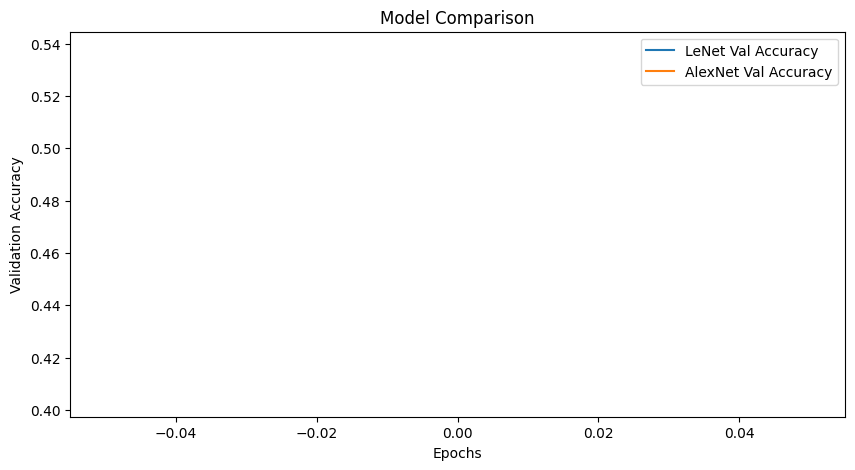

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

def load_data():
    (X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()
    X_train, X_test = X_train / 255.0, X_test / 255.0
    return (X_train, y_train), (X_test, y_test)

(X_train, y_train), (X_test, y_test) = load_data()

def create_lenet():
    model = models.Sequential([
        layers.Conv2D(6, (5, 5), activation='tanh', input_shape=(32, 32, 3)),
        layers.AveragePooling2D(pool_size=2),
        layers.Conv2D(16, (5, 5), activation='tanh'),
        layers.AveragePooling2D(pool_size=2),
        layers.Flatten(),
        layers.Dense(120, activation='tanh'),
        layers.Dense(84, activation='tanh'),
        layers.Dense(10, activation='softmax')
    ])
    return model

def create_alexnet():
    model = models.Sequential([
        layers.Conv2D(64, (3, 3), strides=1, activation='relu', input_shape=(32, 32, 3)),
        layers.MaxPooling2D(pool_size=(2, 2), strides=2),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D(pool_size=(2, 2), strides=2),
        layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
        layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D(pool_size=(2, 2), strides=2),
        layers.Flatten(),
        layers.Dense(1024, activation='relu'),
        layers.Dense(512, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    return model

def train_and_evaluate(model, X_train, y_train, X_test, y_test, optimizer_name):
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=1, batch_size=64, validation_data=(X_test, y_test), verbose=1)
    return history

lenet = create_lenet()
history_lenet = train_and_evaluate(lenet, X_train, y_train, X_test, y_test, 'LeNet')

alexnet = create_alexnet()
history_alexnet = train_and_evaluate(alexnet, X_train, y_train, X_test, y_test, 'AlexNet')

def plot_comparison(histories, labels):
    plt.figure(figsize=(10, 5))
    for history, label in zip(histories, labels):
        plt.plot(history.history['val_accuracy'], label=f'{label} Val Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Validation Accuracy')

    plt.title('Model Comparison')
    plt.legend()
    plt.show()

plot_comparison([history_lenet, history_alexnet], ['LeNet', 'AlexNet'])


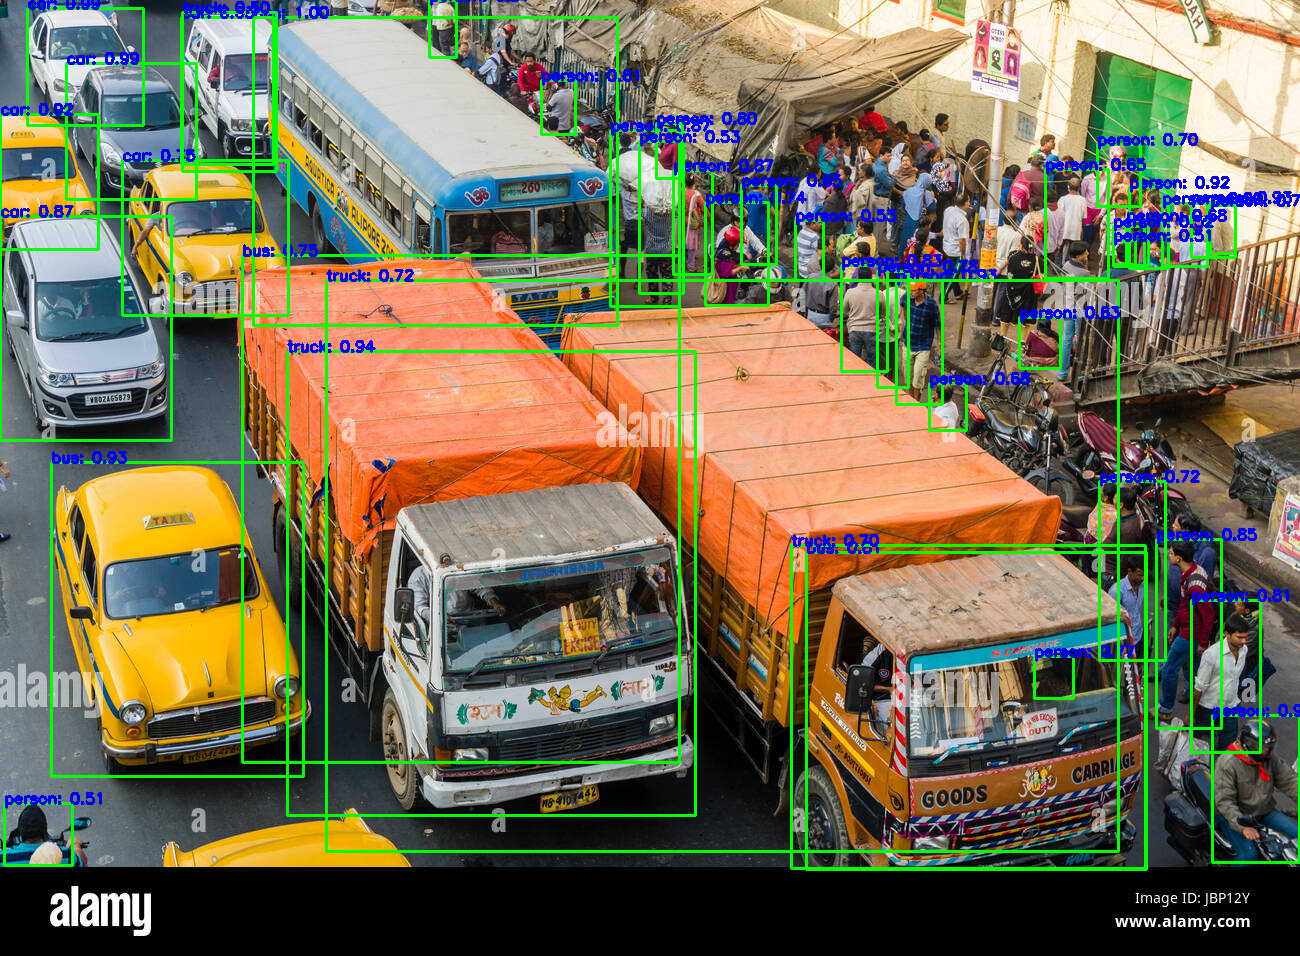

In [ ]:
import torch
import torchvision
from torchvision.transforms import functional as F
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()

COCO_INSTANCE_CATEGORY_NAMES = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle',
    'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench',
    'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella',
    'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove',
    'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana',
    'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant',
    'bed', 'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven',
    'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]

def detect_objects(image_path, confidence_threshold=0.5):
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error: Could not load image from '{image_path}'. Please check the file path and ensure the image exists.")
        return None

    original_image = image.copy()
    image_tensor = F.to_tensor(image)

    with torch.no_grad():
        predictions = model([image_tensor])

    boxes = predictions[0]['boxes'].cpu().numpy()
    labels = predictions[0]['labels'].cpu().numpy()
    scores = predictions[0]['scores'].cpu().numpy()

    for i, box in enumerate(boxes):
        if scores[i] >= confidence_threshold:
            label = COCO_INSTANCE_CATEGORY_NAMES[labels[i]]
            score = scores[i]
            start_point = (int(box[0]), int(box[1]))
            end_point = (int(box[2]), int(box[3]))
            cv2.rectangle(original_image, start_point, end_point, (0, 255, 0), 2)
            cv2.putText(original_image, f"{label}: {score:.2f}", start_point, cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

    return original_image

if __name__ == "__main__":
    IMAGE_PATH = "/content/traffic-jam-on-a-busy-road-in-the-suburb-sealdah-JBP12Y.jpg" # Replace with your image path
    detected_image = detect_objects(IMAGE_PATH)

    if detected_image is not None:
        cv2_imshow(detected_image)


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Flatten
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train/255.0
x_test = x_test/255.0
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

timesteps = x_train.shape[1]
input_dim = x_train.shape[2]

model = Sequential([
    SimpleRNN(128, input_shape = (timesteps, input_dim), activation = 'relu'),
    Dense(64, activation = 'relu'),
    Dense(10, activation = 'softmax')
])

model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

model.fit(x_train, y_train, epochs = 10, batch_size = 64, validation_split = 0.2)

test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose = 2)
print(f"Test accuracy: {test_accuracy:.2f}")


Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 15s 17ms/step - accuracy: 0.6537 - loss: 0.9963 - val_accuracy: 0.9347 - val_loss: 0.2170
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.9354 - loss: 0.2209 - val_accuracy: 0.9483 - val_loss: 0.1676
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.9518 - loss: 0.1605 - val_accuracy: 0.9613 - val_loss: 0.1402
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.9597 - loss: 0.1377 - val_accuracy: 0.9612 - val_loss: 0.1348
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.9637 - loss: 0.1292 - val_accuracy: 0.9651 - val_loss: 0.1213
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9668 - loss: 0.1161 - val_accuracy: 0.9647 - val_loss: 0.1242
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.9702 - loss: 0.1045 - val_accuracy: 0.9726 - val_loss: 0.1000
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.9709 - loss: 0.0996 - va

In [ ]:
import numpy as np
n_steps=24
n_feature=1
time=np.arange(10000)
series=np.sin(time*0.01)+np.random.normal(0,0.1,size=10000)
def create_dataset(series,n_steps):
  X=[]
  y=[]
  for i in range(len(series)-n_steps):
    X.append(series[i+1:i+n_steps])
    y.append(series[i+n_steps])
  return np.array(X),np.array(y)
X,y=create_dataset(series,n_steps)
X=X[...,np.newaxis]
X_train,y_train=X[:7000],y[:7000]
X_valid,y_valid=X[7000:9000],y[7000:9000]
X_test,y_test=X[9000:],y[9000:]
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN,Dense
model=Sequential([SimpleRNN(32,activation="tanh",input_shape=(n_steps,n_feature)),Dense(1)])
model.compile(optimizer="adam",loss="mse")
history=model.fit(X_train,y_train,epochs=20,validation_data=(X_valid,y_valid))
y_pred=model.predict(X_test)
test_loss=model.evaluate(X_test,y_test)
print(f"Test loss: {test_loss}")

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.1563 - val_loss: 0.0130
Epoch 2/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0135 - val_loss: 0.0120
Epoch 3/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0127 - val_loss: 0.0118
Epoch 4/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0124 - val_loss: 0.0117
Epoch 5/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0125 - val_loss: 0.0117
Epoch 6/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0123 - val_loss: 0.0119
Epoch 7/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0122 - val_loss: 0.0121
Epoch 8/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0119 - val_loss: 0.0121
Epoch 9/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0120 - val_loss: 0.0120
Epoch 10/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0124 - val_loss: 0.0115
Epoch 11/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0120 - val_loss: 0.0118
Epoch 12/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.